In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from glob import glob
import warnings
from matplotlib import rcParams
warnings.filterwarnings('ignore')
%matplotlib inline
rcParams['figure.figsize'] = 8,6

In [2]:
df = pd.read_csv(r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\drone\rmb\rtk_testing_2021_alt_prior\flight_gcp_error.csv")

In [3]:
#df.fillna(value=0, inplace=True)
df.replace(9999.00, np.nan, inplace=True)

In [4]:
# df.info()

In [5]:
df.describe()

,altitude,pixcel_m,gcp_1,gcp_2,gcp_3,gcp_4,gcp_5,gcp_6,gcp_7,gcp_8,gcp_9
count,54.000000,54.000000,54.000000,53.000000,53.000000,54.000000,54.000000,30.000000,30.000000,30.00000,0.0
mean,76.666667,0.042370,0.983333,1.018679,1.055925,1.161481,1.035185,1.179333,1.226333,1.22800,NaN
std,20.740990,0.011601,1.125048,1.147254,1.156050,1.280723,1.170832,1.295256,1.346058,1.29023,NaN
min,50.000000,0.027000,0.020000,0.030000,0.010000,0.010000,0.010000,0.040000,0.060000,0.02000,NaN
25%,50.000000,0.028000,0.080000,0.100000,0.070000,0.140000,0.107500,0.167500,0.160000,0.09000,NaN
50%,80.000000,0.044000,0.455000,0.370000,0.710000,0.770000,0.385000,0.375000,0.485000,0.78500,NaN
75%,100.000000,0.054750,1.730000,1.750000,1.800000,1.957500,1.815000,1.830000,1.795000,1.78250,NaN
max,100.000000,0.059000,3.370000,3.440000,3.630000,4.140000,3.630000,3.440000,3.700000,3.47000,NaN


In [6]:
no_gcp = df[df['gcp']== 'none']
# no_gcp.describe()

In [7]:
df['avg_dist'] = df[['gcp_1', 'gcp_2', 'gcp_3', 'gcp_4', 'gcp_5', 'gcp_6', 'gcp_7', 'gcp_8', 'gcp_9']].mean(axis=1)

In [8]:

no_gcp = df[df['gcp'] == 'none']
no_gcp['gcp_count'] = 0

gcp = df[df['gcp'] != 'c_ne_se_sw_nw']
gcp['gcp_count'] = 5


data = pd.concat([gcp, no_gcp])

In [9]:
data.groupby(['camera', 'altitude', 'gcp_count'])['avg_dist'].describe()

count      mean       std      min       25%  \
camera altitude gcp_count                                                 
multi  50       0            4.0  2.501187  0.794421  1.80625  1.876562   
                5            4.0  2.501187  0.794421  1.80625  1.876562   
       80       0            4.0  1.856688  1.129524  0.97000  1.141000   
                5            4.0  1.856688  1.129524  0.97000  1.141000   
       100      0            4.0  1.862000  1.151663  0.92800  1.139500   
                5            4.0  1.862000  1.151663  0.92800  1.139500   
rgb    50       0            5.0  2.095400  1.170069  0.56750  1.588000   
                5            5.0  2.095400  1.170069  0.56750  1.588000   
       80       0            5.0  1.666400  1.162509  0.59875  0.972000   
                5            5.0  1.666400  1.162509  0.59875  0.972000   
       100      0            5.0  1.656650  1.185498  0.56625  0.938000   
                5            5.0  1.656650  1.185498  0.56625  0.938000   

                                50%       75%      max  
camera altitude gcp_count                               
multi  50       0          2.363000  2.987625  3.47250  
                5          2.363000  2.987625  3.47250  
       80       0          1.493375  2.209062  3.47000  
                5          1.493375  2.209062  3.47000  
       100      0          1.510625  2.233125  3.49875  
                5          1.510625  2.233125  3.49875  
rgb    50       0          1.827500  2.964000  3.53000  
                5          1.827500  2.964000  3.53000  
       80       0          1.280000  1.926250  3.55500  
                5          1.280000  1.926250  3.55500  
       100      0          1.334000  1.845000  3.60000  
                5          1.334000  1.845000  3.60000

In [10]:
list_data = [no_gcp, gcp]
list_label = ["No Ground Control Points", "5 Ground Control Points"]

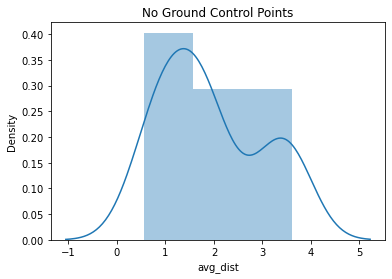

Skewness: 0.509897
Excess Kurtosis: -1.134509
Basic stats: 
Mean: 1.924880
Var: 1.092518
Std: 1.045236


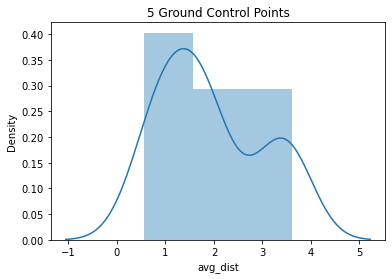

Skewness: 0.509897
Excess Kurtosis: -1.134509
Basic stats: 
Mean: 1.924880
Var: 1.092518
Std: 1.045236


In [11]:
for i, label in zip(list_data, list_label):
    sns.distplot(i.avg_dist).set_title(label)
    plt.show()
    print('='*40)
    print("Skewness: %f" % i.avg_dist.skew())
    print("Excess Kurtosis: %f" % i.avg_dist.kurt())
    print('Basic stats: ')
    print("Mean: %f" % i.avg_dist.mean())
    print("Var: %f" % i.avg_dist.var())
    print("Std: %f" % i.avg_dist.std())
    print('='*40)

    plt.show()

------------------------------------------------------------


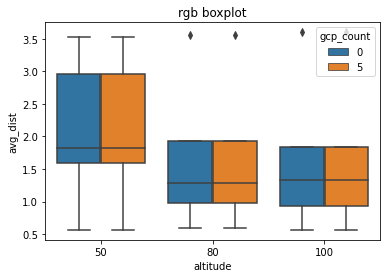


Value counts per camera / gcp_count

camera  gcp_count
multi   0            12
        5            12
rgb     0            15
        5            15
dtype: int64
------------------------------------------------------------


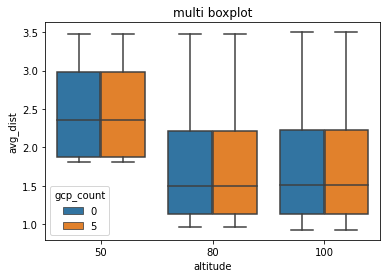


Value counts per camera / gcp_count

camera  gcp_count
multi   0            12
        5            12
rgb     0            15
        5            15
dtype: int64


In [12]:
for cam in data.camera.unique():
    print('-'*60)
    camera_df = data[data['camera']== cam]
    sns.boxplot(x='altitude', y='avg_dist', data=camera_df, hue="gcp_count").set(title= cam + ' boxplot')
    plt.show()
    print('='*40)
    print('\nValue counts per camera / gcp_count\n')

    print(data.groupby(['camera', 'gcp_count']).size())
